# Analysing Global Protests since 1990

## Introduction
This project will explore a set of three datasets related to protest and democracy. This project aggregates information from three distinct datasets, offering a rich, multidimensional perspective on mass mobilization, socio-political conditions, and human development. It is a valuable resource for analyzing trends, identifying patterns, and exploring correlations between protests and various socio-economic and political factors.

## Description of the data points
******
### Mass Mobilization Dataset

Focus: Tracks protest events globally, capturing information about the type of protests, their scale, and their outcomes.

Features include:
Dates and locations of protests.
Types of demands made by protesters (e.g., economic, political, social).
Government responses to protests.

### V-Dem Dataset (Varieties of Democracy)

Focus: Measures the quality and characteristics of democracy across countries.
Features include:
Indicators of democratic governance (e.g., electoral integrity, civil liberties).
Political participation and freedom of expression.
Trends in authoritarian practices.

### Human Development Index (HDI) Dataset

Focus: Captures socio-economic development metrics across nations, with the key metric here being the HDI score.


To begin, we'll start by importing our relevant libraries, and reading in our data from csv.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

massmob_path = "data/massmobilisation.csv"
massmob_df = pd.read_csv(massmob_path)

print(massmob_df.head())
print (massmob_df.columns)

# Since I'm focusing on complete data, I want to remove all rows where the value in the protest column is 0.
# I also don't want to include the year 2020, since the data only goes up to the end of February, and wouldn't be an accurate depiction of the level of protest (even allowing for fewer protests due to Covid)
massmob_df = massmob_df[(massmob_df['protest'] != 0) & (massmob_df['year'] != 2020)]




          id country  ccode  year         region  protest  protestnumber  \
0  201990001  Canada     20  1990  North America        1              1   
1  201990002  Canada     20  1990  North America        1              2   
2  201990003  Canada     20  1990  North America        1              3   
3  201990004  Canada     20  1990  North America        1              4   
4  201990005  Canada     20  1990  North America        1              5   

   startday  startmonth  startyear  ...  protesterdemand4   stateresponse1  \
0      15.0         1.0     1990.0  ...               NaN           ignore   
1      25.0         6.0     1990.0  ...               NaN           ignore   
2       1.0         7.0     1990.0  ...               NaN           ignore   
3      12.0         7.0     1990.0  ...               NaN     accomodation   
4      14.0         8.0     1990.0  ...               NaN  crowd dispersal   

   stateresponse2  stateresponse3 stateresponse4 stateresponse5  \
0      

Let's start by looking at global protest frequency on a yearly basis.

    year  num_protests
0   1990           572
1   1991           372
2   1992           409
3   1993           329
4   1994           390
5   1995           355
6   1996           409
7   1997           488
8   1998           442
9   1999           411
10  2000           488
11  2001           393
12  2002           415
13  2003           387
14  2004           442
15  2005           497
16  2006           454
17  2007           445
18  2008           398
19  2009           376
20  2010           452
21  2011           688
22  2012           553
23  2013           586
24  2014           769
25  2015           857
26  2016           713
27  2017           541
28  2018           698
29  2019           814
504.76666666666665
857
329


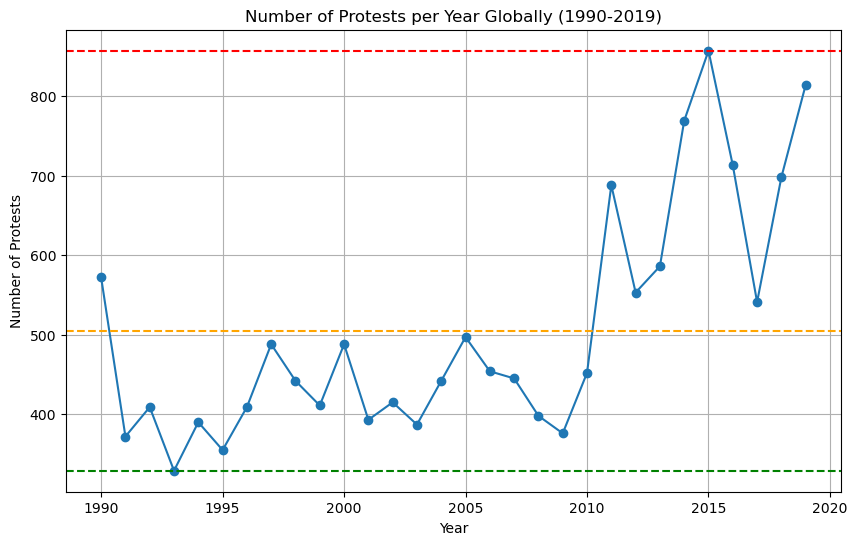

In [4]:
# Group by 'Year'
yeargrouped = massmob_df.groupby('year')

# Count the number of protests for each year
protests_per_year = yeargrouped.size().reset_index(name='num_protests')

print(protests_per_year)

# Calculate average, min, and max
average = protests_per_year['num_protests'].mean()
minimum = protests_per_year['num_protests'].min()
maximum = protests_per_year['num_protests'].max()
print (average)
print(maximum)
print(minimum)

# Plot protests per year
plt.figure(figsize=(10, 6))
plt.plot(protests_per_year['year'], protests_per_year['num_protests'], marker='o')
plt.title('Number of Protests per Year Globally (1990-2019)')
plt.xlabel('Year')

plt.ylabel('Number of Protests')
# Add average, min, and max lines
plt.axhline(y=average, color='orange', linestyle='--', label=f'Average: {average:.2f}')
plt.axhline(y=minimum, color='green', linestyle='--', label=f'Min: {minimum}')
plt.axhline(y=maximum, color='red', linestyle='--', label=f'Max: {maximum}')

plt.grid()
plt.show()



As you can see from the plot above, the number of yearly protests in the 90s and 00s stayed relatively constant, before a large spike in the 2010s, aligning with the Global banking crisis, the Arab Spring movement and the increase of climate-related protests in the West. 1993 was the year of least mobilisation, with 329 protests recorded. 2015, on the other hand, could be considered the largest year of mass mobilisation in recent decades, with 857 protests recorded worldwide. The average number of yearly protests from 1990 to 2020 was 492; however, as previously mentioned, this is swayed heavily by the 2010s, with yearly numbers only hitting this total 4 times before 2011.

            region  num_protests
0           Africa          3164
1             Asia          3099
2  Central America           451
3           Europe          4964
4             MENA          1251
5    North America           520
6          Oceania            38
7    South America          1656


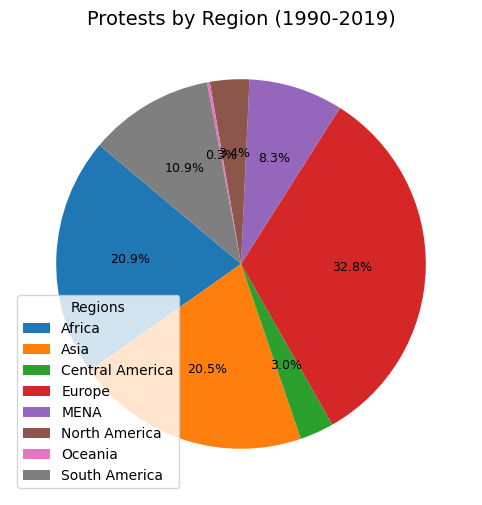

In [6]:
# Group by region and count the number of protests
regiongrouped = massmob_df.groupby('region')
protests_per_region = regiongrouped.size().reset_index(name='num_protests')
print(protests_per_region)

# Plot pie chart
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    protests_per_region['num_protests'], 
    autopct='%1.1f%%',  # Display percentage with 1 decimal place
     startangle=140,
    textprops={'fontsize': 9}  # Adjust font size of labels and percentages
)
plt.title('Protests by Region (1990-2019)', fontsize=14)  # Adjust title font size

# Add legend
plt.legend(wedges, protests_per_region['region'], title="Regions", fontsize=10)  # Adjust legend font size
plt.show()




As we can see above, Europe has the highest proportion of the protests recorded in this period, followed respectively by Africa and Asia, with a sizeable proportion also in South America and MENA (Middle East & North Africa).

Let's now look at another indicator; the primary reason for protest.

              protesterdemand1  num_protests
0           labor wage dispute          1704
1              land farm issue           466
2             police brutality           817
3  political behavior, process          9614
4  price increases, tax policy          1086
5        removal of politician          1004
6          social restrictions           451


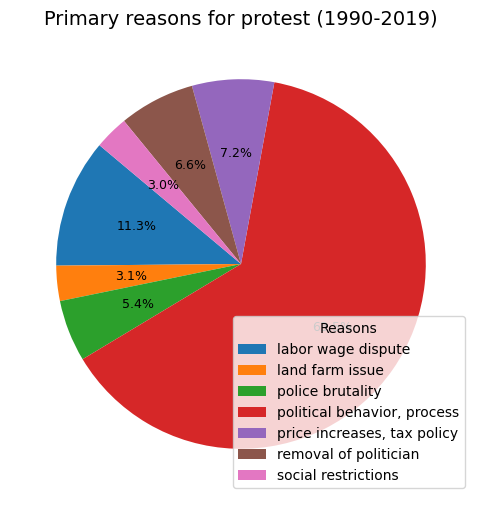

In [8]:
reasongrouped = massmob_df.groupby('protesterdemand1')
protests_by_reason = reasongrouped.size().reset_index(name='num_protests')
print(protests_by_reason)

# Plot pie chart
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    protests_by_reason['num_protests'], 
    autopct='%1.1f%%',  # Display percentage with 1 decimal place
     startangle=140,
    textprops={'fontsize': 9}  # Adjust font size of labels and percentages
)
plt.title('Primary reasons for protest (1990-2019)', fontsize=14)  # Adjust title font size

# Add legend
plt.legend(wedges, protests_by_reason['protesterdemand1'], title="Reasons", fontsize=10)  # Adjust legend font size
plt.show()


Interestingly, political behavior and process has dominated the reasoning behind protests taking places in the previous 3 decades. Of the other reasons, only Labour/wage disputes reaches 10%.

Let's now refine our analysis to look at Ireland.

In [9]:
ireland_df = massmob_df[massmob_df['country'] == 'Ireland']
print(ireland_df.head())


              id  country  ccode  year  region  protest  protestnumber  \
3383  2051992001  Ireland    205  1992  Europe        1              1   
3384  2051992002  Ireland    205  1992  Europe        1              2   
3385  2051992003  Ireland    205  1992  Europe        1              3   
3386  2051992004  Ireland    205  1992  Europe        1              4   
3387  2051992005  Ireland    205  1992  Europe        1              5   

      startday  startmonth  startyear  ...  protesterdemand4  stateresponse1  \
3383       6.0         6.0     1992.0  ...               NaN          ignore   
3384       6.0         6.0     1992.0  ...               NaN          ignore   
3385       1.0         7.0     1992.0  ...               NaN          ignore   
3386      16.0         7.0     1992.0  ...               NaN          ignore   
3387      21.0         7.0     1992.0  ...               NaN          ignore   

      stateresponse2  stateresponse3 stateresponse4 stateresponse5  \
3383

    year  num_protests
0   1992            17
1   1993             9
2   1994            33
3   1996             1
4   1997            28
5   1999             1
6   2000             1
7   2002             1
8   2003            40
9   2004            27
10  2005            29
11  2006            38
12  2007            41
13  2008             1
14  2009             3
15  2010             4
16  2012             2
17  2013            27
18  2014            56
19  2015            32
20  2016            19
21  2017             6
22  2018             9
23  2019             6
17.958333333333332
56
1


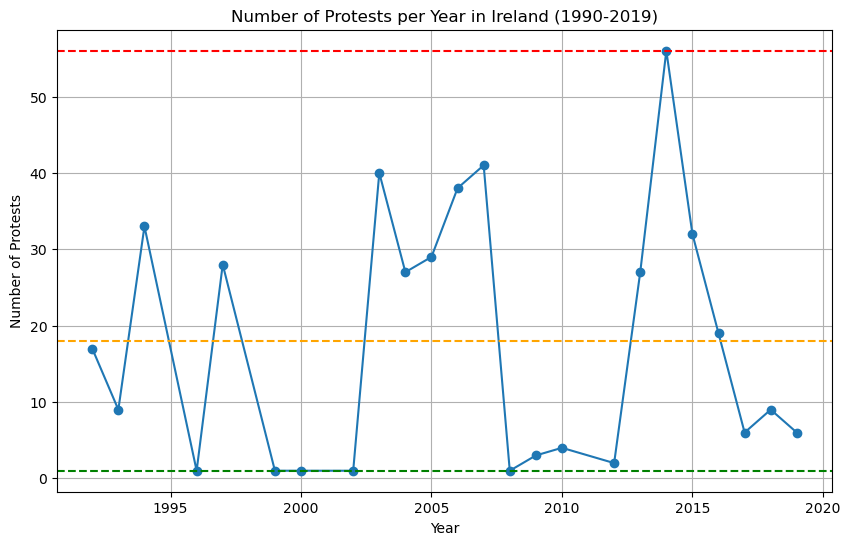

In [11]:
# Group by 'Year'
yeargrouped_ie = ireland_df.groupby('year')

# Count the number of protests for each year
protests_per_year_ie = yeargrouped_ie.size().reset_index(name='num_protests')

print(protests_per_year_ie)

# Calculate average, min, and max
average = protests_per_year_ie['num_protests'].mean()
minimum = protests_per_year_ie['num_protests'].min()
maximum = protests_per_year_ie['num_protests'].max()
print (average)
print(maximum)
print(minimum)

# Plot protests per year
plt.figure(figsize=(10, 6))
plt.plot(protests_per_year_ie['year'], protests_per_year_ie['num_protests'], marker='o')
plt.title('Number of Protests per Year in Ireland (1990-2019)')
plt.xlabel('Year')

plt.ylabel('Number of Protests')
# Add average, min, and max lines
plt.axhline(y=average, color='orange', linestyle='--', label=f'Average: {average:.2f}')
plt.axhline(y=minimum, color='green', linestyle='--', label=f'Min: {minimum}')
plt.axhline(y=maximum, color='red', linestyle='--', label=f'Max: {maximum}')

plt.grid()
plt.show()

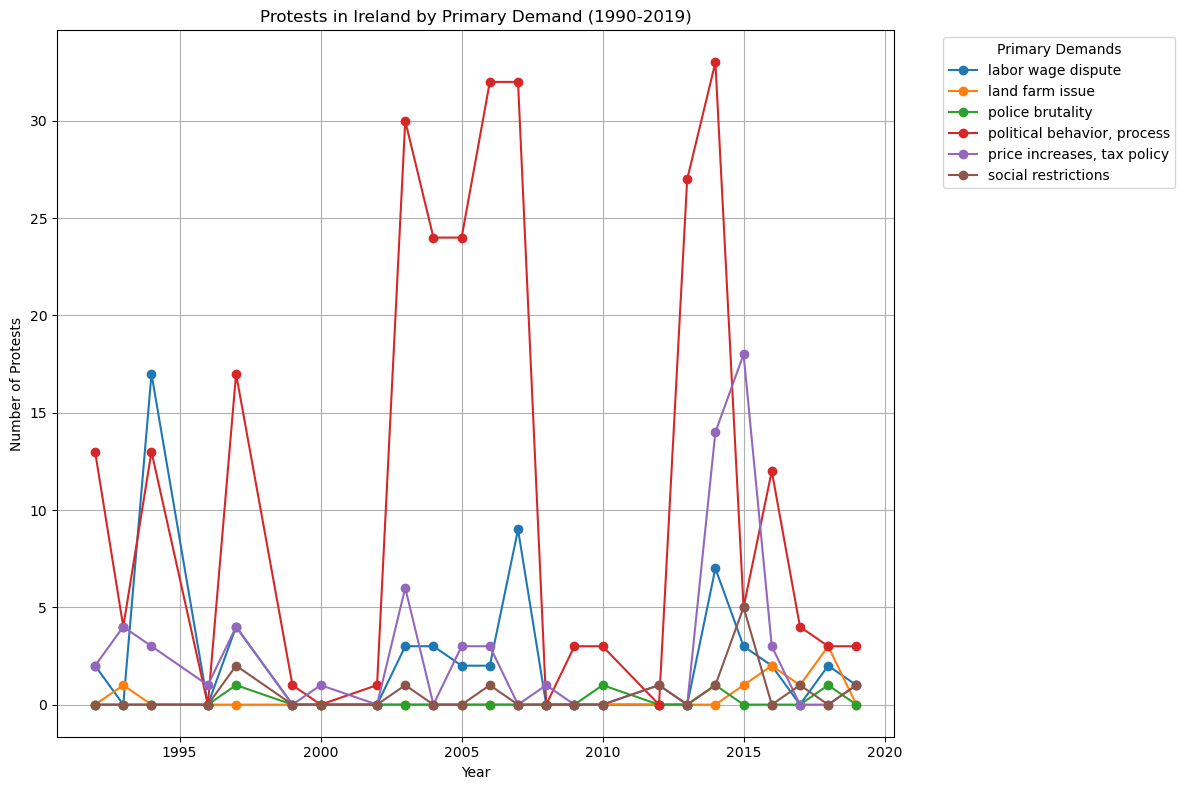

In [12]:
# Group by Year and Primary Demand, and count the number of protests
protests_by_reason_ie = ireland_df.groupby(['year', 'protesterdemand1']).size().reset_index(name='num_protests')

# Pivot the table to have years as rows and demands as columns
pivot_data = protests_by_reason_ie.pivot(index='year', columns='protesterdemand1', values='num_protests').fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
for reason in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[reason], label=reason, marker='o')

plt.title('Protests in Ireland by Primary Demand (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')
plt.legend(title='Primary Demands', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid()
plt.tight_layout()
plt.show()

Next:
- Add Linear Regression
- Add in V-dem csv and have a look at a couple of metrics across the world:
 - Liberaldemocracy index vs numprotests

Since the line plot jumps up and down, it can be difficult to measure whether the number of protests in Ireland is general increasing over time. One way to check this would be through linear regression. I want to:
a) Show if there is a general trend upwards in terms of the number of protests
b) Show the predicted number of protests for the next 10 years

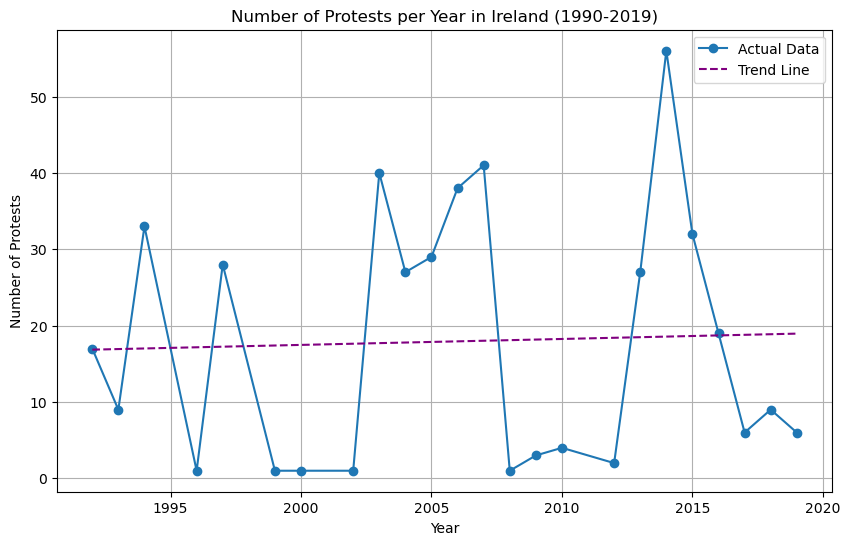

There is an upward trend with a slope of 0.08.


In [14]:
from sklearn.linear_model import LinearRegression

# Prepare data for linear regression
X = protests_per_year_ie['year'].values.reshape(-1, 1)  # Predictor (Year)
y = protests_per_year_ie['num_protests'].values  # Response (Number of Protests)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the slope (trend)
slope = model.coef_[0]

# Plot protests per year with trend line
plt.figure(figsize=(10, 6))
plt.plot(protests_per_year_ie['year'], protests_per_year_ie['num_protests'], marker='o', label='Actual Data')
plt.plot(protests_per_year_ie['year'], model.predict(X), color='purple', linestyle='--', label='Trend Line')
plt.title('Number of Protests per Year in Ireland (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')
plt.grid()
plt.legend()
plt.show()

# Display the trend
if slope > 0:
    print(f"There is an upward trend with a slope of {slope:.2f}.")
else:
    print(f"There is no upward trend (slope = {slope:.2f}).")


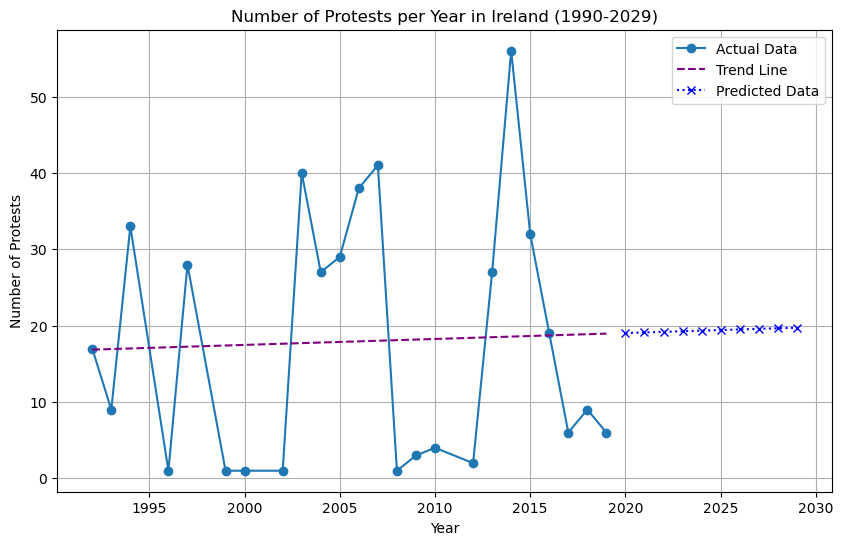

Predicted number of protests in 2020: 19.03
Predicted number of protests in 2021: 19.11
Predicted number of protests in 2022: 19.19
Predicted number of protests in 2023: 19.26
Predicted number of protests in 2024: 19.34
Predicted number of protests in 2025: 19.42
Predicted number of protests in 2026: 19.50
Predicted number of protests in 2027: 19.57
Predicted number of protests in 2028: 19.65
Predicted number of protests in 2029: 19.73


In [23]:
# Predict for the next 10 years
future_years = np.arange(2020, 2030).reshape(-1, 1)
future_protests = model.predict(future_years)

# Combine predictions with actual data
plt.figure(figsize=(10, 6))
plt.plot(protests_per_year_ie['year'], protests_per_year_ie['num_protests'], marker='o', label='Actual Data')
plt.plot(protests_per_year_ie['year'], model.predict(X), color='purple', linestyle='--', label='Trend Line')
plt.plot(future_years, future_protests, marker='x', linestyle=':', color='blue', label='Predicted Data')
plt.title('Number of Protests per Year in Ireland (1990-2029)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')
plt.grid()
plt.legend()
plt.show()

# Print predictions
for year, pred in zip(future_years.flatten(), future_protests):
    print(f"Predicted number of protests in {year}: {pred:.2f}")


In [16]:
vdem_path = "/Users/myleshenehan/Downloads/Correct-pfda/pfda/project/data/v-dem.csv.gz"
vdem_df = pd.read_csv(vdem_path, compression='gzip') # after problems with Github's size limits, I decided to compress the csv.
vdem_df = vdem_df[(vdem_df['year'] >= 1990) & (vdem_df['year'] <= 2019)]
print(vdem_df.head())




/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_40228/1880503888.py:2: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  vdem_df = pd.read_csv(vdem_path, compression='gzip') # after problems with Github's size limits, I decided to compress the csv.


    country_name country_text_id  country_id  year historical_date  project  \
201       Mexico             MEX           3  1990      1990-12-31        0   
202       Mexico             MEX           3  1991      1991-12-31        0   
203       Mexico             MEX           3  1992      1992-12-31        0   
204       Mexico             MEX           3  1993      1993-12-31        0   
205       Mexico             MEX           3  1994      1994-12-31        0   

     historical               histname  codingstart  codingend  ...  \
201           1  United Mexican States         1789       2023  ...   
202           1  United Mexican States         1789       2023  ...   
203           1  United Mexican States         1789       2023  ...   
204           1  United Mexican States         1789       2023  ...   
205           1  United Mexican States         1789       2023  ...   

     e_mipopula  e_miurbani  e_pefeliex    e_wb_pop  e_pechmor  e_miinteco  \
201   84913.650     

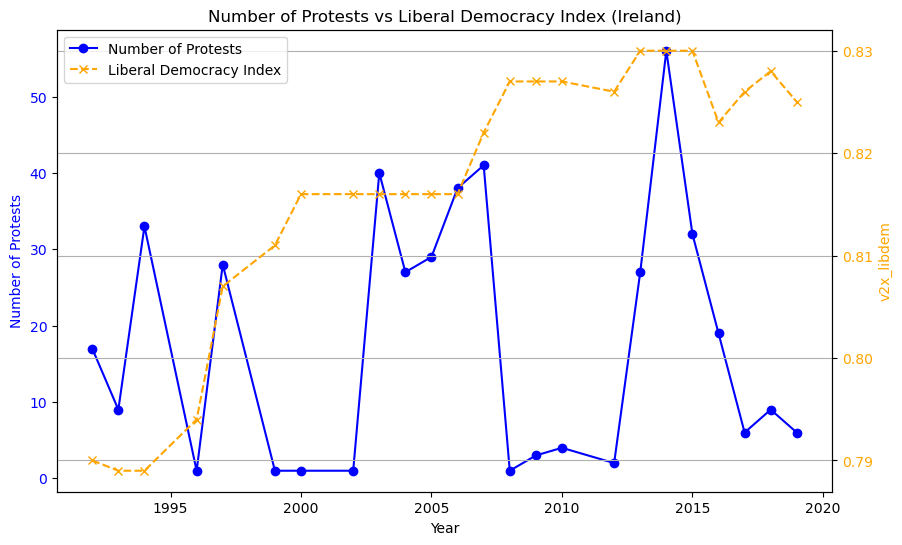

In [18]:
ireland_vdem = vdem_df[vdem_df['country_name'] == 'Ireland']

ireland_vdem = ireland_vdem[['year', 'v2x_libdem']]

# Merge datasets on 'year'
merged_df = pd.merge(protests_per_year_ie, ireland_vdem, on='year', how='inner')

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of protests (primary y-axis)
ax1.plot(
    merged_df['year'],
    merged_df['num_protests'],
    color='blue',
    marker='o',
    label='Number of Protests'
)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Protests', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for v2x_libdem
ax2 = ax1.twinx()
ax2.plot(
    merged_df['year'],
    merged_df['v2x_libdem'],
    color='orange',
    marker='x',
    linestyle='--',
    label='Liberal Democracy Index'
)
ax2.set_ylabel('v2x_libdem', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and grid
plt.title('Number of Protests vs Liberal Democracy Index (Ireland)')
plt.grid()

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show plot
plt.show()




Other correlations to look at 

In [21]:
# Calculate correlation between num_protests and v2x_libdem
correlation = merged_df['num_protests'].corr(merged_df['v2x_libdem'])

print(f"Pearson correlation coefficient: {correlation:.2f}")



Pearson correlation coefficient: 0.05


Looking at the Pearson correlation coefficient, there is not a huge correlation between the number of protests and the Liberal Democracy Index; however, the year with the highest number of protests does align with the year with the highest liberal democracy index, perhaps suggesting that people felt empowered in that period to make change.

What to look at next:
- Correlation between number of protests per region, and its average Freedom of Expression score. The narrow the scope, we'll look at just the G7 countries.

In [28]:
g7_countries = ['United States', 'Canada', 'United Kingdom', 'France', 'Germany', 'Italy', 'Japan']

# Filter the datasets for G7 countries
protests_g7 = massmob_df[massmob_df['country'].isin(g7_countries)]
vdem_g7 = vdem_df[vdem_df['country_name'].isin(g7_countries)]


total_protests_g7 = protests_g7.groupby('country').size().reset_index(name='total_protests')
avg_freexp_g7 = vdem_g7.groupby('country_name')['v2x_freexp'].mean().reset_index(name='avg_freedom_of_expression')

# Standardize column names for merging
total_protests_g7.rename(columns={'country': 'country_name'}, inplace=True)

# Merge the two datasets
combined_g7 = pd.merge(total_protests_g7, avg_freexp_g7, on='country_name')

print(combined_g7)











     country_name  total_protests  avg_freedom_of_expression
0          Canada              52                   0.950233
1          France             542                   0.974100
2         Germany             362                   0.982833
3           Italy             166                   0.956900
4           Japan              59                   0.923067
5  United Kingdom             574                   0.935000


Now plot this...